### PART 3: Model Visualization

As I have introduced RF and GBDT models in Part 2, we have seen that feature importances is a way to visualize these two models. However, by introducing them by plenty of arrays, it is difficult to see what is going on. In this section, I will visualize RF and GBDT by using stacked bar charts and line graphs.  

Three main points from the models:  
- In 5-day, 14-day and 20-day forecasting period, volatility plays the biggest role in determining SET index direction. For 3-day, trend is the biggest factor. For 10-day, volatility is the biggest role.
- Since the multinomial logistic regression outputs softmax from scikit-learn, I will divide Pr(X=1) by Pr(X=-1), so we get exp((delta_beta)x), and we use this to interpet the sign: if that factor increases, what is the change on this ratio: Pr(X=1)/Pr(X=-1).  
- For trend, if we see increase in trend, we expect the increase on prob that stock price will increase relative to the opposite.  
- For momentum, if we see increase in momentum, except for 5 day, there is an increase in prob that stock price will increase relative to the opposite.  
- For volatility, in short horizon, this will increase prob that stock price will increase relative to the opposite. In longer horizon (up to 20), the opposite occurs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

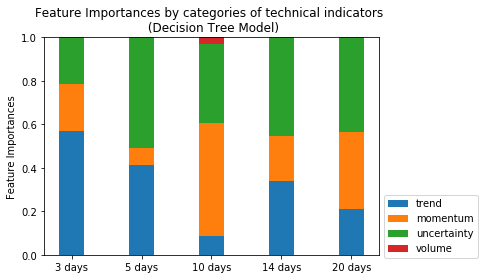

In [4]:
WIDTH = 0.35
IDX = np.arange(5)

fig, ax = plt.subplots()
RF_Trend_Features = np.array([0.56976271, 0.41295118, 0.08621677, 0.33943182, 0.20996348])
RF_Mom_Features = np.array([0.21561306, 0.08018301, 0.52131511, 0.20550703, 0.35508355])
RF_Unc_Features = np.array([0.21462423, 0.50686581, 0.36069666, 0.45506116, 0.43495297])
RF_Vol_Features = np.array([0, 0, 0.03177146, 0, 0])

p1 = ax.bar(IDX, RF_Trend_Features, WIDTH)
p2 = ax.bar(IDX, RF_Mom_Features, WIDTH, bottom = RF_Trend_Features)
p3 = ax.bar(IDX, RF_Unc_Features, WIDTH, bottom = RF_Trend_Features + RF_Mom_Features)
p4 = ax.bar(IDX,RF_Vol_Features, WIDTH, bottom = RF_Trend_Features + RF_Mom_Features + RF_Unc_Features)

plt.ylabel('Feature Importances')
plt.title('Feature Importances by categories of technical indicators \n (Decision Tree Model)')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('trend', 'momentum', 'uncertainty', 'volume'), bbox_to_anchor=(1, 0.3))


In [5]:
LR3 = [[-0.00874855, -0.6401581 ,  0.00370314, -0.01456536],
       [ 0.00807165,  0.66880405, -0.0162707 ,  0.09555339],
       [ 0.0006769 , -0.02864595,  0.01256756, -0.08098803]]
LR5 = [[-1.11344693e-02,  3.45653536e-01, -1.18957408e-05,
        -2.33130146e-02],
       [ 8.28640734e-03,  2.02705731e-01, -7.33126645e-03,
         5.49183085e-02],
       [ 2.84806199e-03, -5.48359267e-01,  7.34316220e-03,
        -3.16052939e-02]]
LR10 = [[-6.13223219e-03, -1.33476835e+00, -7.05186098e-04,
         7.41928203e-02],
       [ 6.06637562e-03, -1.27543462e-01,  3.86049359e-03,
        -1.65605056e-01],
       [ 6.58565660e-05,  1.46231181e+00, -3.15530749e-03,
         9.14122353e-02]]
LR14 = [[-1.54993192e-03, -9.46011261e-01,  8.48112694e-03,
         5.24079221e-02],
       [ 1.30535769e-03, -2.57262557e-01, -1.55407677e-02,
        -1.55903002e-01],
       [ 2.44574225e-04,  1.20327382e+00,  7.05964081e-03,
         1.03495079e-01]]
LR20 = [[-0.00672221, -0.55903002,  0.00800641,  0.00988758],
       [ 0.00955596, -0.13962922, -0.01415543, -0.11717878],
       [-0.00283375,  0.69865924,  0.00614901,  0.10729121]]

([<matplotlib.axis.XTick at 0x188ed6f2248>,
 <a list of 5 Text xticklabel objects>)

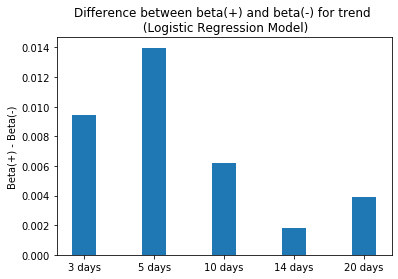

In [7]:
WIDTH = 0.35
IDX = np.arange(5)

fig, ax = plt.subplots()
p1 = ax.bar(IDX, [LR3[2][0] - LR3[0][0], LR5[2][0] - LR5[0][0], LR10[2][0] - LR10[0][0], LR14[2][0] - LR14[0][0], LR20[2][0] - LR20[0][0],], WIDTH)

plt.ylabel('Beta(+) - Beta(-)')
plt.title('Difference between beta(+) and beta(-) for trend \n (Logistic Regression Model)')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

([<matplotlib.axis.XTick at 0x188ed83c748>,
 <a list of 5 Text xticklabel objects>)

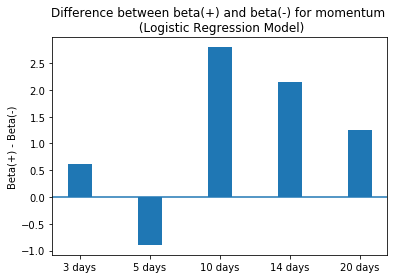

In [10]:
WIDTH = 0.35
IDX = np.arange(5)

fig, ax = plt.subplots()
p1 = ax.bar(IDX, [LR3[2][1] - LR3[0][1], LR5[2][1] - LR5[0][1], LR10[2][1] - LR10[0][1], LR14[2][1] - LR14[0][1], LR20[2][1] - LR20[0][1],], WIDTH)
p2 = ax.axhline(y=0)

plt.ylabel('Beta(+) - Beta(-)')
plt.title('Difference between beta(+) and beta(-) for momentum \n (Logistic Regression Model)')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

([<matplotlib.axis.XTick at 0x188ed8b43c8>,
 <a list of 5 Text xticklabel objects>)

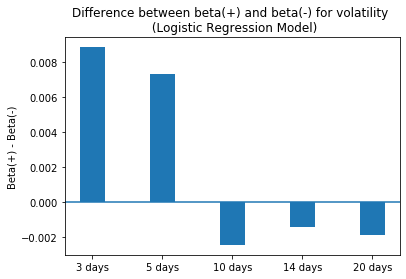

In [11]:
WIDTH = 0.35
IDX = np.arange(5)

fig, ax = plt.subplots()
p1 = ax.bar(IDX, [LR3[2][2] - LR3[0][2], LR5[2][2] - LR5[0][2], LR10[2][2] - LR10[0][2], LR14[2][2] - LR14[0][2], LR20[2][2] - LR20[0][2],], WIDTH)
p2 = ax.axhline(y=0)

plt.ylabel('Beta(+) - Beta(-)')
plt.title('Difference between beta(+) and beta(-) for volatility \n (Logistic Regression Model)')
plt.xticks(IDX, ('3 days', '5 days', '10 days', '14 days', '20 days'))

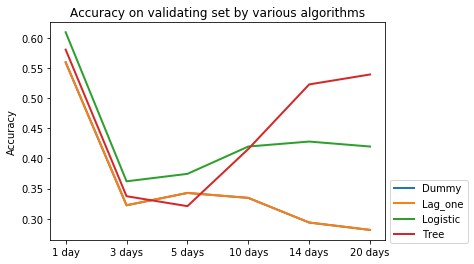

In [6]:
IDX = np.arange(6)
Dummy = [0.5591836734693878, 0.3224489795918367, 0.34285714285714286, 0.3346938775510204, 0.2938775510204082, 0.2816326530612245]
Lag_one = [0.5591836734693878, 0.3224489795918367, 0.34285714285714286, 0.3346938775510204,  0.2938775510204082, 0.2816326530612245]
LR = [0.6090534979423868, 0.36213991769547327, 0.37448559670781895, 0.41975308641975306, 0.4279835390946502, 0.41975308641975306]
DT = [0.5802469135802469, 0.3374485596707819, 0.32098765432098764, 0.4156378600823045, 0.522633744855967, 0.5390946502057613]
fig, ax = plt.subplots()
l1 = ax.plot(IDX, Dummy, linewidth = 2)
l2 = ax.plot(IDX, Lag_one, linewidth = 2)
l3 = ax.plot(IDX, LR, linewidth = 2)
l4 = ax.plot(IDX, DT, linewidth = 2)

plt.ylabel('Accuracy')
plt.title('Accuracy on validating set by various algorithms')
plt.xticks(IDX, ('1 day', '3 days', '5 days', '10 days', '14 days', '20 days'))

plt.legend((l1[0], l2[0], l3[0], l4[0]), ('Dummy', 'Lag_one', 'Logistic', 'Tree'), bbox_to_anchor=(1, 0.3))

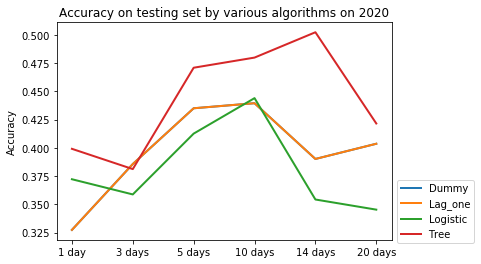

In [7]:
# This is for 2020
IDX = np.arange(6)
Dummy = [0.3273542600896861, 0.38565022421524664, 0.4349775784753363, 0.43946188340807174, 0.3901345291479821, 0.40358744394618834]
Lag_one = [0.3273542600896861, 0.38565022421524664, 0.4349775784753363, 0.43946188340807174,  0.3901345291479821, 0.40358744394618834]
LR = [0.3721973094170404, 0.35874439461883406, 0.4125560538116592, 0.4439461883408072, 0.3542600896860987, 0.3452914798206278]
DT = [0.3991031390134529, 0.3811659192825112, 0.47085201793721976, 0.4798206278026906, 0.5022421524663677, 0.42152466367713004]
fig, ax = plt.subplots()
l1 = ax.plot(IDX, Dummy, linewidth = 2)
l2 = ax.plot(IDX, Lag_one, linewidth = 2)
l3 = ax.plot(IDX, LR, linewidth = 2)
l4 = ax.plot(IDX, DT, linewidth = 2)

plt.ylabel('Accuracy')
plt.title('Accuracy on testing set by various algorithms on 2020')
plt.xticks(IDX, ('1 day', '3 days', '5 days', '10 days', '14 days', '20 days'))

plt.legend((l1[0], l2[0], l3[0], l4[0]), ('Dummy', 'Lag_one', 'Logistic', 'Tree'), bbox_to_anchor=(1, 0.3))